## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score

## Feature dictionary

In [2]:
cols = pd.read_excel(r'data_dictionary.xlsx')

In [3]:
cols

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


## Loading the dataset

In [4]:
df = pd.read_csv(r'whole data.csv')

In [5]:
df

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [6]:
df.shape

(4410, 29)

## Checking for missing values

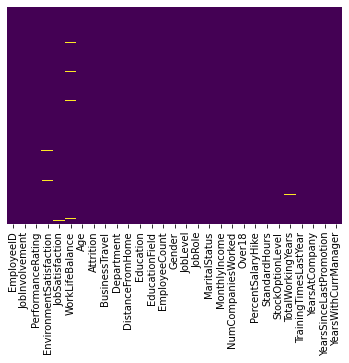

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Null values are very few, we can drop them without affecting data set 

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [10]:
df.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,2.728837,3.153953,2.723953,2.724884,2.761163,36.926977,9.197907,2.913256,1.0,...,65059.844186,2.690000,15.210698,8.0,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558
std,1272.117692,0.710769,0.360946,1.093802,1.101875,0.707800,9.146517,8.097059,1.024774,0.0,...,47045.398914,2.495764,3.662777,0.0,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1110.750000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,...,29260.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2215.500000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,...,49360.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3314.250000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,...,83802.500000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000
max,4409.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   float64
 4   JobSatisfaction          4300 non-null   float64
 5   WorkLifeBalance          4300 non-null   float64
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   object 
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  EmployeeCount            4300 non-null   int64  
 14  Gender                  

## Label encoding: to convert categorical values into continuous values

In [12]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0],str):
        df[i] = encoder.fit_transform(df[i])

In [13]:
df

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,2,2,...,1.0,0,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,1,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,1,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,0,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,2,1,...,4.0,0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,2,2,...,1.0,0,18,8,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,2,1,...,3.0,0,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,2,1,...,2.0,0,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,2,1,...,0.0,0,20,8,0,5.0,4,4,1,2


## The data is imbalanced

In [14]:
df.Attrition.value_counts()

0    3605
1     695
Name: Attrition, dtype: int64

In [15]:
X = df.drop(['Attrition'], axis=1)
y =df.Attrition

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [17]:
lr = LogisticRegression()


In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state = 4589)

In [19]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

In [20]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.8502906976744186

In [21]:
pred = lr.predict(x_test)

In [22]:
accuracy_score(y_test, pred)

0.8639534883720931

In [23]:
f1_score(y_test, pred)

0.21476510067114096

In [24]:
recall_score(y_test,pred)

0.13008130081300814

## As the data is imbalance, accuracy is might not be the best option for measuring performance.
## Hence if we look at  F1 score and recall score, they are very low

## Trying undersampling


In [25]:
df.reset_index(inplace=True)
li = list(df[df.Attrition == 0].sample(n=2910).index)
df = df.drop(df.index[li])

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state = 489)

In [27]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

In [28]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.852906976744186

In [29]:
y_pred = lr.predict(x_test)

In [30]:
print(metrics.confusion_matrix(y_test, y_pred))

[[710  10]
 [124  16]]


In [31]:
lr.score(x_test, y_test)

0.8441860465116279

In [32]:
accuracy_score(y_test, y_pred)

0.8441860465116279

In [33]:
recall_score(y_test,y_pred)

0.11428571428571428

In [34]:
f1_score(y_test,y_pred)


0.19277108433734938

## After undersampling the F1 score and recall score dropped. So undersampling is not the best option.

## Using SMOTE: Synthetic Minority Oversampling Technique
## SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
Scaler_X = StandardScaler()
scaled_X = Scaler_X.fit_transform(X)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy='auto')
X_train, y_train = sm.fit_sample(X_train, y_train)

In [38]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote_pred = lr.predict(X_test)

In [39]:
accuracy_score(y_test, smote_pred)

0.6818604651162791

In [40]:
f1_score(y_test, smote_pred)

0.4

In [41]:
recall_score(y_test, smote_pred)

0.6298342541436464

## Creating intercept and coefficient table to see how features are related to target.

In [42]:
feature_names = X.columns.values
summary_table = pd.DataFrame(columns = ['Feature_names'], data = feature_names)
summary_table['coeff']= np.transpose(lr.coef_)
summary_table

summary_table.index = summary_table.index +1
summary_table.iloc[0]= ['Intercept', lr.intercept_[0]]

summary_table.sort_index()

,Feature_names,coeff
1,Intercept,-0.482206
2,JobInvolvement,0.048737
3,PerformanceRating,0.096058
4,EnvironmentSatisfaction,-0.407207
5,JobSatisfaction,-0.331364
6,WorkLifeBalance,-0.140709
7,Age,-0.383581
8,BusinessTravel,-0.012607
9,Department,-0.218463
10,DistanceFromHome,-0.137394


### We can say that SMOTE is best for this imbalanced data set.
### Now we need to select relevant features and see if we can increase the accuracy more or not!

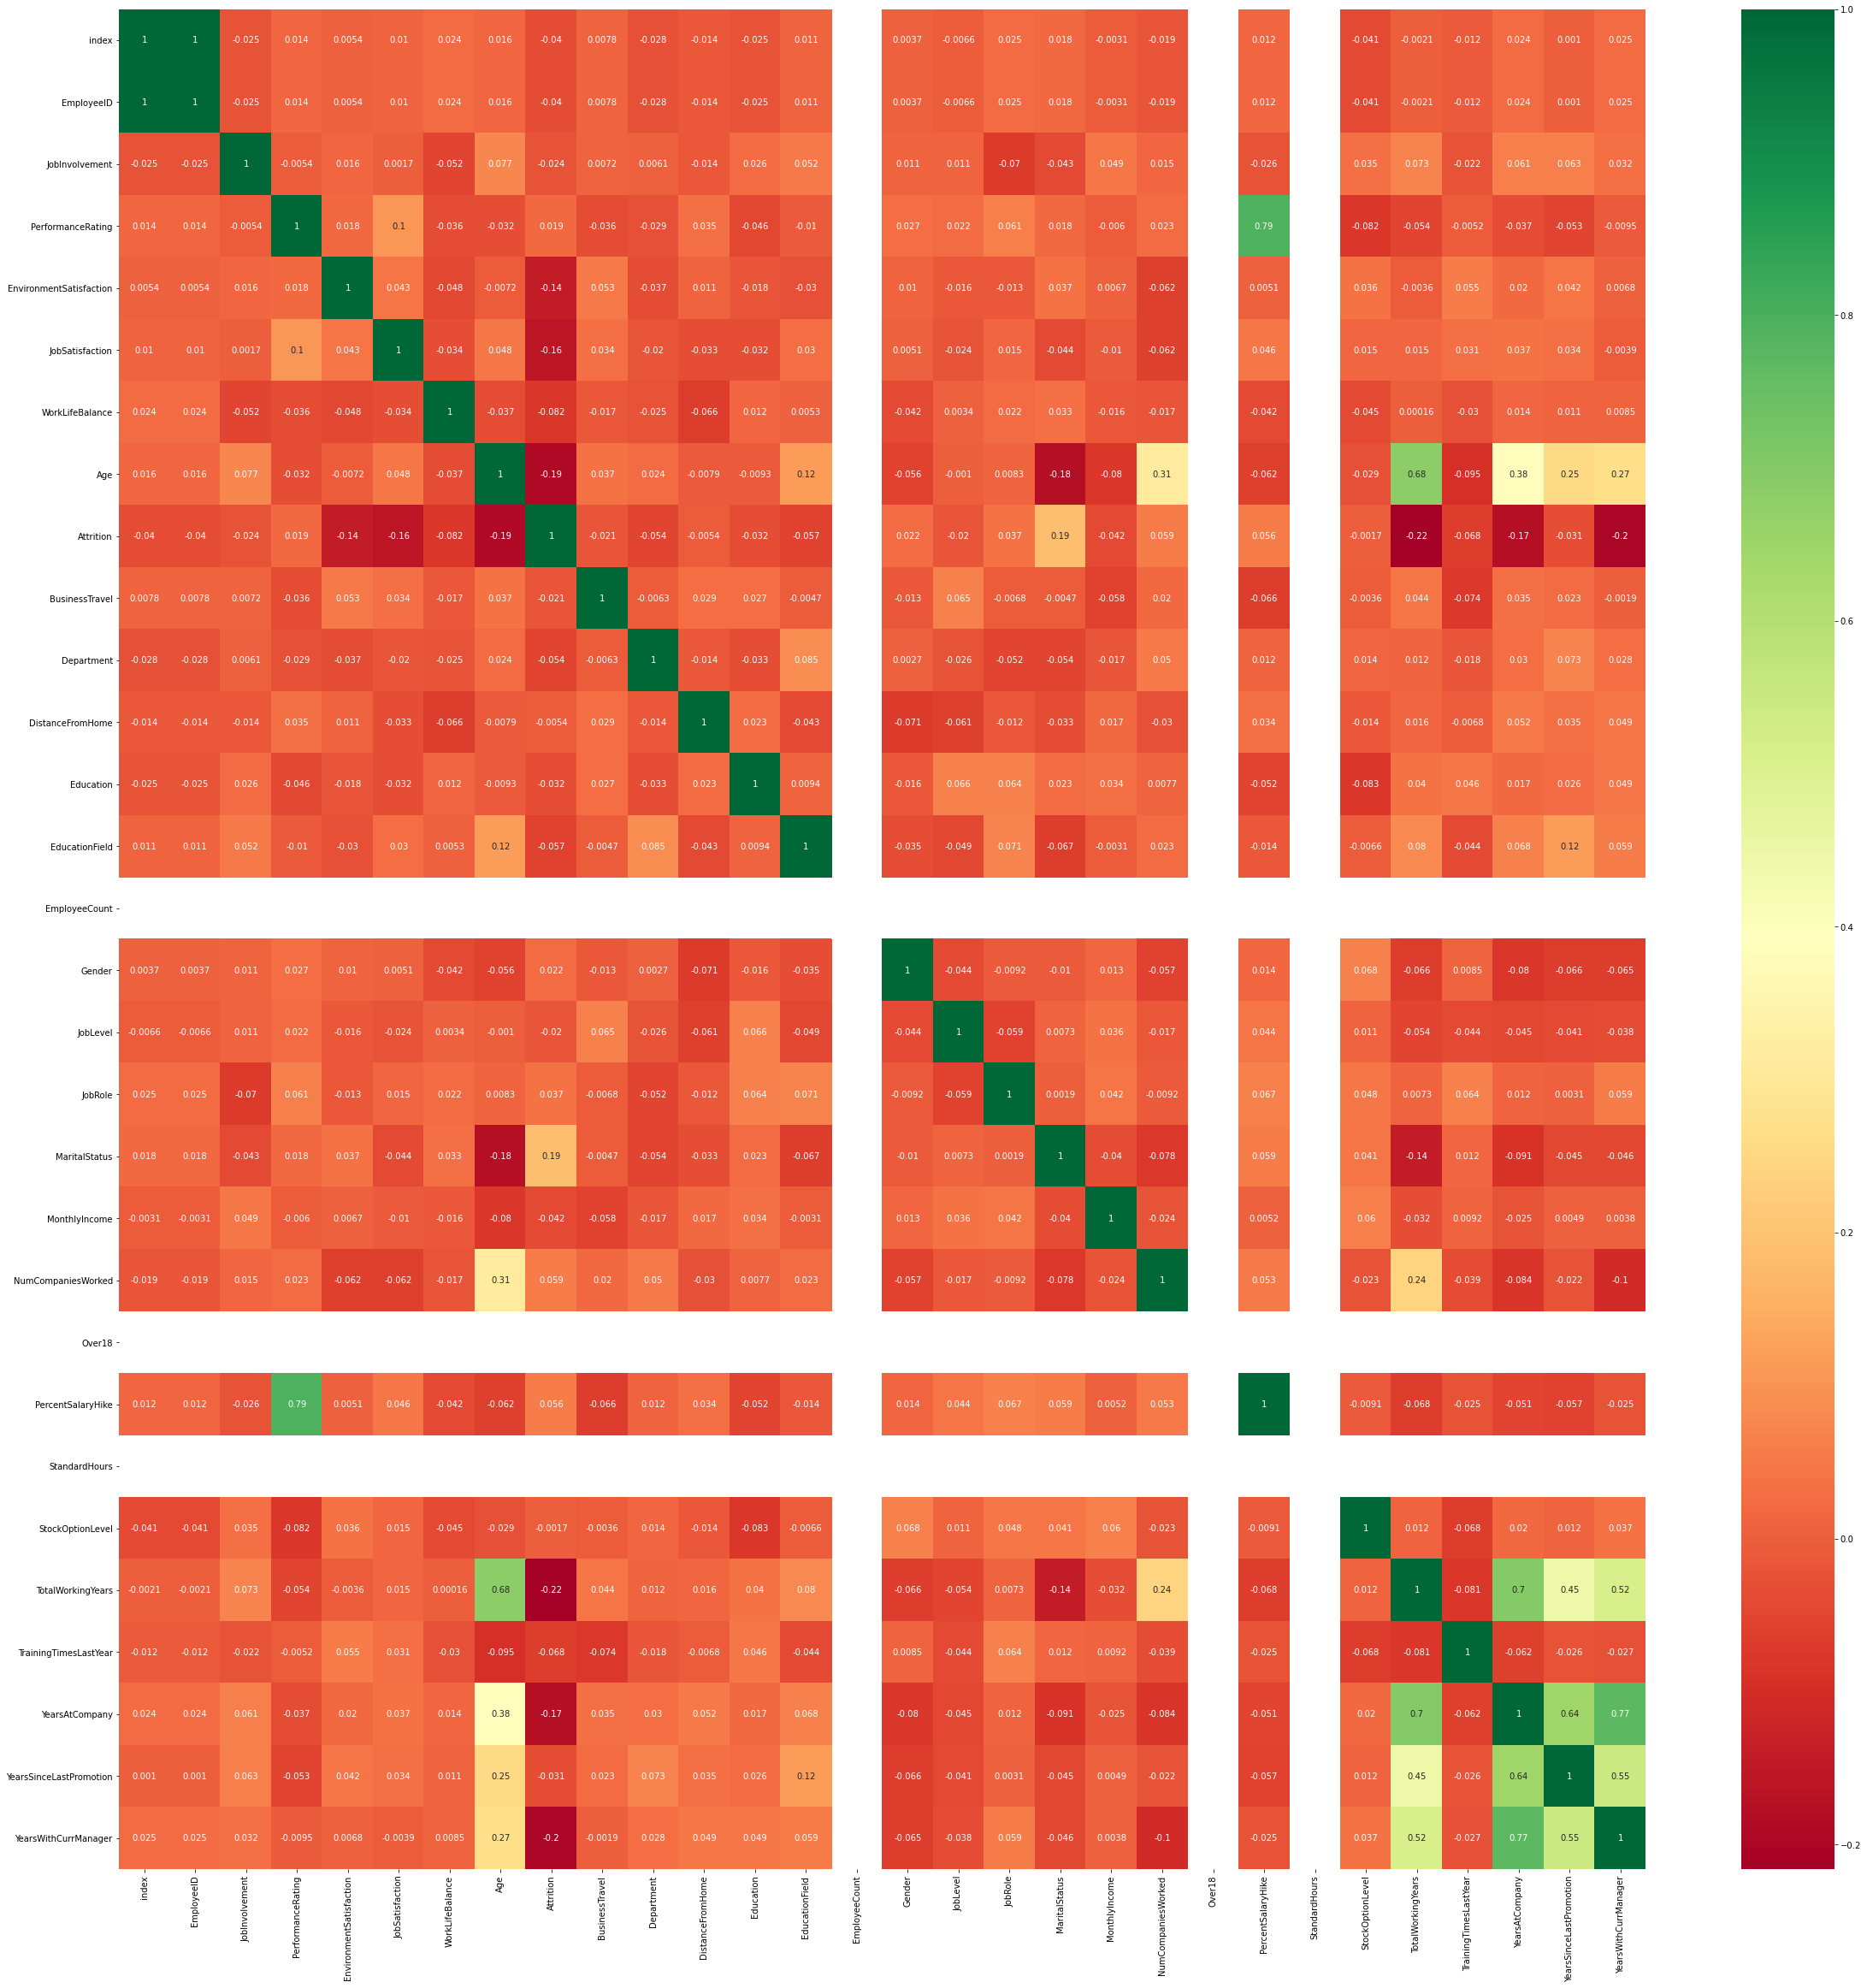

In [43]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [44]:
print(df.Over18.value_counts())
print(df.StandardHours.value_counts())
print(df.EmployeeCount.value_counts())

0    1390
Name: Over18, dtype: int64
8    1390
Name: StandardHours, dtype: int64
1    1390
Name: EmployeeCount, dtype: int64


In [45]:
#Dropping them as they are not relevant
df.drop(['StandardHours','EmployeeCount','EmployeeID','Over18'], inplace=True, axis=1)

In [46]:
X = df.drop(['Attrition'], axis=1)
y =df.Attrition

In [47]:
#Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif=add_constant(X)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)  

const                      203.029012
index                        1.008964
JobInvolvement               1.026999
PerformanceRating            2.817510
EnvironmentSatisfaction      1.022502
JobSatisfaction              1.039435
WorkLifeBalance              1.023471
Age                          2.095366
BusinessTravel               1.029646
Department                   1.031213
DistanceFromHome             1.029104
Education                    1.038784
EducationField               1.051051
Gender                       1.029564
JobLevel                     1.039238
JobRole                      1.045878
MaritalStatus                1.057481
MonthlyIncome                1.027620
NumCompaniesWorked           1.295253
PercentSalaryHike            2.815196
StockOptionLevel             1.055540
TotalWorkingYears            3.542484
TrainingTimesLastYear        1.039770
YearsAtCompany               4.408231
YearsSinceLastPromotion      1.769759
YearsWithCurrManager         2.522367
dtype: float

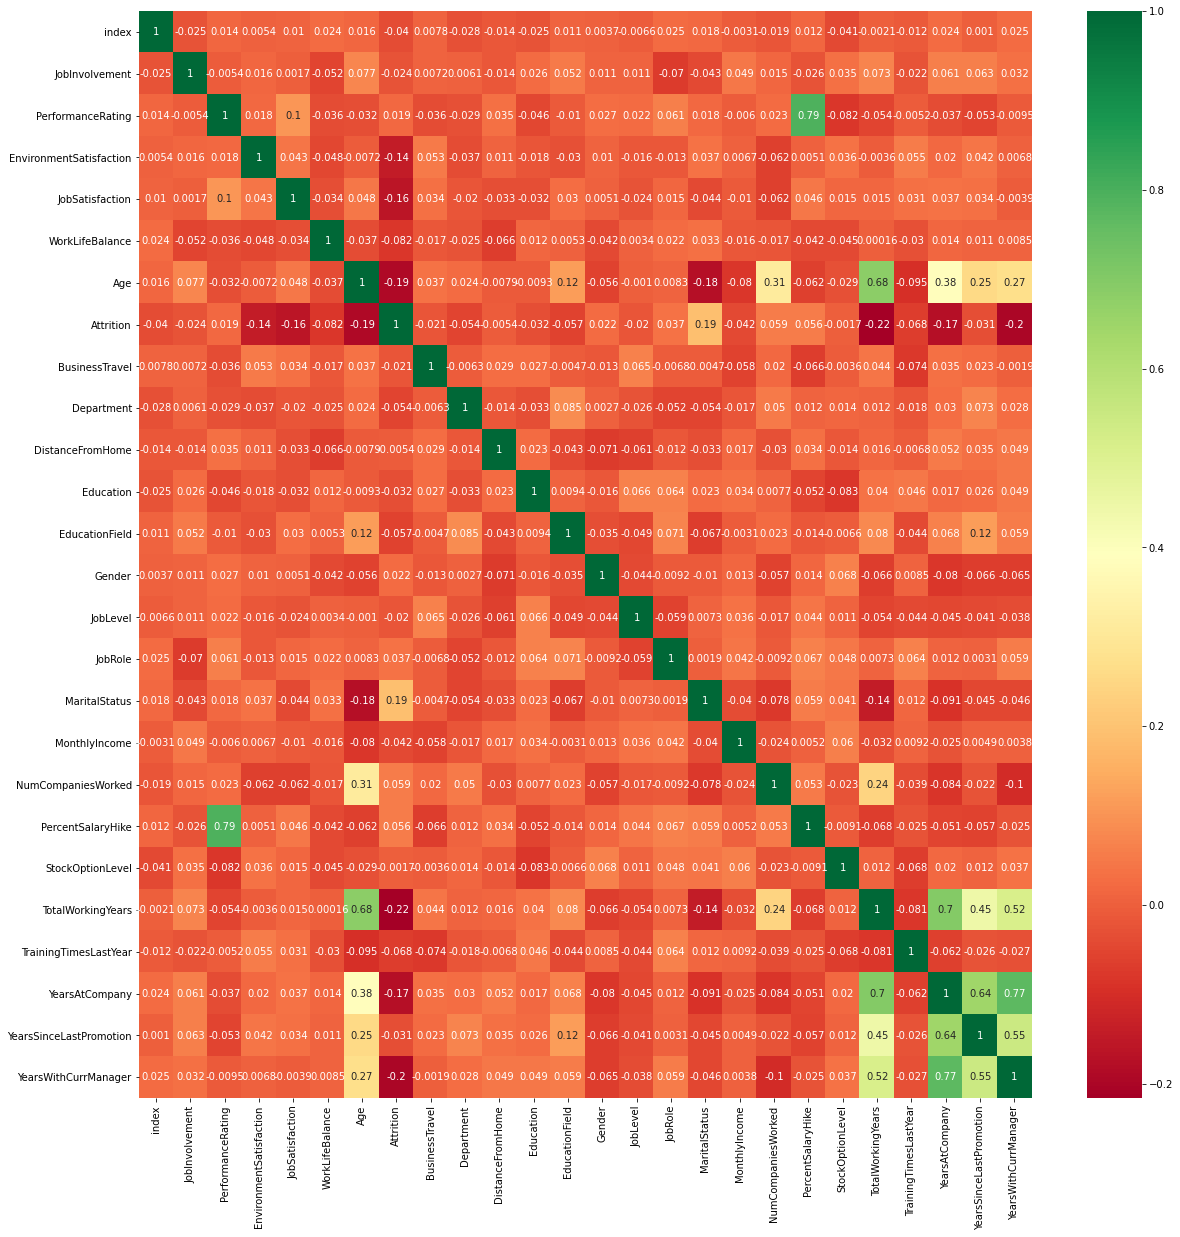

In [48]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Columns we should drop:



### 1) Job involvement: because its coefficient value is near 0 that means it does not have major effect on Attrition
### 2) Age: as it has high correlation with many features such as total working years, years at company and it does not affect Attrition that much.
### 3) Business travel the coefficient table shows that this feature has approximately zero effect on Attrition
### 4) Performance Rating: as it is highly correlated to percent salary hike and has less significance, VIF is also high
### 5) Years At company: it is correlated with years with current manager and age hence dropping it.
### 6) Stock Option level: approximately zero effect on Attrition
### 7) Distance from home: approximately zero effect on Attrition
### 8) Education: approximately zero effect on Attrition
### 9) Gender: approximately zero effect on Attrition
### 10) Department: approximately zero effect on Attrition

In [49]:
X.drop(['JobInvolvement','Age','BusinessTravel','PerformanceRating','YearsAtCompany','DistanceFromHome', 'StockOptionLevel'], inplace=True, axis=1)

In [50]:
X.drop(['Education','Gender','JobRole','Department'],inplace =True, axis =1)

In [51]:
Scaler_X = StandardScaler()
scaled_X = Scaler_X.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy='auto')
X_train, y_train = sm.fit_sample(X_train, y_train)

In [53]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = lr.predict(X_test)

# Checking accuracy

In [54]:
accuracy_score(y_test, smote_pred) 

0.6580459770114943

In [55]:
f1_score(y_test, smote_pred)

0.6757493188010899

In [56]:
recall_score(y_test, smote_pred)

0.7251461988304093

In [ ]:
## recall and F1 increased significantly

In [57]:
feature_names = X.columns.values
summary_table = pd.DataFrame(columns = ['Feature_names'], data = feature_names)
summary_table['coeff']= np.transpose(lr.coef_)
summary_table

summary_table.index = summary_table.index +1
summary_table.iloc[0]= ['Intercept', lr.intercept_[0]]




summary_table.sort_index()

,Feature_names,coeff
1,Intercept,0.004486
2,EnvironmentSatisfaction,-0.362913
3,JobSatisfaction,-0.391611
4,WorkLifeBalance,-0.253947
5,EducationField,-0.082812
6,JobLevel,-0.073031
7,MaritalStatus,0.406879
8,MonthlyIncome,-0.064829
9,NumCompaniesWorked,0.266805
10,PercentSalaryHike,0.047334


### Environment Satisfaction, Job satisfaction, Marital Status, Total working years, Years since last promotion, Years with current managers are some important features to take into consideration if company wants to reduce its attrition rate.